# Problema dos elevadores - IA


## Definição da classe que modela o elevador:

In [11]:
import math
class EstadoElevador():

    def __init__(self, estado, op,pai,goal = [21,25]):
        self.elevadores = estado
        self.op = op  # operacao que gerou o estado
        self.n = len(estado)
        self.pai = pai  # o pai
        self.profundidade = 0
        self.g = 0  # custo de ter gerado o nodo (todo o caminho)
        self.goal = goal #[min,max]

        if pai is None:
            self.profundidade = 0
            self.g = self.custo()
        else:
            self.profundidade = pai.get_profundidade() + 1
            self.g = self.custo() + pai.custo()

    def get_profundidade(self):
        return self.profundidade

    def get_estado(self):
        return self.estado

    def get_pai(self):
        return self.pai
    def get_custo(self):
        return self.g

    def eh_meta(self):
        """Verifica se o estado é a meta."""
        min_goal = self.goal[0]
        max_goal = self.goal[1]
        for i in self.elevadores:
            if i < min_goal or i > max_goal:
                return False
        return True

    def __eq__(self, other):
        """Verifica se um estado é igual a outro (usado para poda)."""
        if isinstance(other, EstadoElevador):
            return self.elevadores == other.elevadores
        return False

    def __lt__(self,other):
        return self.get_custo() < other.get_custo()

    def make_action(self, action):
    #actions -> 0= -13 / 1 = +8
        #action[0] e action[1] são os elevadores
        num_floors = 49
        dir = action[2] #especifica a direção  = baixo /  = cima
        state = self.elevadores.copy()
        if dir == "Desce":
            for i in [action[0],action[1]]:
                state[i] -=13
                if state[i]<0:
                    state[i] = 0
        elif dir == "Sobe":
            for i in [action[0],action[1]]:
                state[i] +=8
                if state[i]> num_floors:
                    state[i] = num_floors
        return state

    def gerar_acoes_possiveis(self):
        pares = []
        for a in ["Desce","Sobe"]:
            for i in range(self.n):
                for j in range(i + 1, self.n):
                    pares.append((i, j,a))
        return pares # retorna i  e j que são os elavadores escolhidos e a açao a /(i,j,a)

    def sucessores(self,flag_all):
        #se flag_all = 1 sucessores são todos, se 0 apenas os novos
        """Gera uma lista de sucessores do estado."""
        suc = []  # a lista de sucessores

        for action in self.gerar_acoes_possiveis():
            proximo = EstadoElevador(self.make_action(action),action,self,self.goal)
            if flag_all :
                if proximo.eh_descendente_novo(self):
                    suc.append(proximo)
            else:
                suc.append(proximo)


        return suc

    def __str__(self):
         return "\nElevadores: " + str(self.elevadores) + " - Ação: " + str(self.op)

    def custo(self):
        """Custo para geracao do estado."""
        aux = 0
        min_goal = self.goal[0]
        max_goal = self.goal[1]
        for elevador in self.elevadores:
            if elevador < min_goal:
                aux += max_goal- elevador
            elif elevador > max_goal:
                aux += elevador - max_goal

        return aux

    # def custo_2(self):
    #   min_goal = self.goal[0]
    #   max_goal = self.goal[1]
    #   aux = 0

    #   for elevador in self.elevadores:
    #         if elevador < min_goal:
    #           aux += math.ceil((max_goal-elevador)%8)
    #         elif elevador > max_goal:
    #           aux += math.ceil((elevador - min_goal)%13)
    #   return aux

    def eh_descendente_novo(self, ascensor):
        """
        testa se o nodo não tem um ascendente igual a ele (se um dos pais é igual a ele)
        """
        if ascensor is None:
            return True
        else:
            if ascensor.elevadores == self.elevadores:
                return False
            else:
                return self.eh_descendente_novo(ascensor.pai)

    def monta_caminho(self):
        """imprime o caminho até a raiz"""
        return self.monta_caminho_aux(self)

    def monta_caminho_aux(self, n):
        if n is not None:
            if n.pai is not None:  # Verifica se não é o nó raiz
                return self.monta_caminho_aux(n.pai) + str(n) + "; "
            else:
                return str(n) + "; "  # Se for o nó raiz, apenas retorna sua representação
        return ""


## Definição dos algoritmos de busca:

In [ ]:
def busca_profundidade(estado_inicial,Poda=True,profundidademax = 10,timemax=50):
    abertos = [estado_inicial]
    nodos_visitados = 0
    start_time = time.time()

    while abertos:
        estado_atual = abertos.pop()
        nodos_visitados +=1
        #print(estado_atual.get_profundidade())
        if time.time() - start_time > timemax:  # Verifica se 10 segundos se passaram
            return estado_atual, nodos_visitados, '{:,.4f}'.format(time.time() - start_time )


        if estado_atual.eh_meta():
            return estado_atual,nodos_visitados,'{:,.4f}'.format(time.time() - start_time )


        if estado_atual.get_profundidade() < profundidademax:
            sucessores = estado_atual.sucessores(Poda) #se sucessores(true) = poda os nodos já vistos
            abertos.extend(sucessores)
    print("Sem resposta nessa profundidade")

    return None

In [ ]:
def busca_largura(estado_inicial,Poda=True,timemax=50,profundidademax = 10):
    abertos = [estado_inicial]
    nodos_visitados = 0
    start_time = time.time()

    while abertos:
        estado_atual = abertos.pop(0)
        nodos_visitados +=1
        #print(estado_atual.get_profundidade())
        if time.time() - start_time > timemax:  # Verifica se 10 segundos se passaram
            return estado_atual, nodos_visitados, '{:,.4f}'.format(time.time() - start_time )


        if estado_atual.eh_meta():
            return estado_atual,nodos_visitados,'{:,.4f}'.format(time.time() - start_time )

        if estado_atual.get_profundidade() < profundidademax:
            sucessores = estado_atual.sucessores(Poda) #se sucessores(true) = poda os nodos já vistos
            abertos.extend(sucessores)
    print("Sem resposta nessa profundidade")

    return None

In [ ]:
from queue import PriorityQueue
def A_estrela(estado_inicial,Poda=True,timemax=50,profundidademax = 10):
    abertos = PriorityQueue()
    abertos.put(estado_inicial)
    nodos_visitados = 0
    start_time = time.time()

    while abertos:
        estado_atual = abertos.get()
        nodos_visitados +=1
        #print(estado_atual.get_profundidade())
        if time.time() - start_time > timemax:  # Verifica se 10 segundos se passaram
            return estado_atual, nodos_visitados, '{:,.4f}'.format(time.time() - start_time )

        if estado_atual.eh_meta():
            return estado_atual,nodos_visitados, '{:,.4f}'.format(time.time() - start_time )

        if estado_atual.get_profundidade() < profundidademax:
            sucessores = estado_atual.sucessores(Poda) #se sucessores(true) = poda os nodos já vistos
            for i in sucessores:
                abertos.put(i)
    print("Sem resposta nessa profundidade")

    return None

## Resultados:

In [ ]:
#para salvar os resultados
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Para visualizar uma resposta expecifica

In [ ]:
import time
#estado inicial
#inicio = [17,26,20,19,31]
inicio = [49,49,49,49,49]
goal = [21,25] #min e max do range de goal

no_inicial= EstadoElevador(inicio,"inicio",None,goal)
tempo_inicio = time.time()
resposta,total_visitados,tempo = A_estrela(no_inicial)
tempo_final = time.time()


tempo_total = '{:,.4f}'.format(tempo_final - tempo_inicio)
print(f"{total_visitados} nós visitados ao total")
print("Profundidade da resposta:",resposta.get_profundidade())
print(f"Tempo total de busca: {tempo_total}s")
print("Resposta:" ,resposta.monta_caminho())

6 nós visitados ao total
Profundidade da resposta: 5
Tempo total de busca: 0.0015s
Resposta: 
Elevadores: [49, 49, 49, 49, 49] - Ação: inicio; 
Elevadores: [36, 36, 49, 49, 49] - Ação: (0, 1, 'Desce'); 
Elevadores: [36, 36, 36, 36, 49] - Ação: (2, 3, 'Desce'); 
Elevadores: [23, 36, 36, 36, 36] - Ação: (0, 4, 'Desce'); 
Elevadores: [23, 23, 23, 36, 36] - Ação: (1, 2, 'Desce'); 
Elevadores: [23, 23, 23, 23, 23] - Ação: (3, 4, 'Desce'); 


Variando o range:


In [ ]:
import re
inicio = [17,26,20,19,31]
metodos = [A_estrela,busca_largura,busca_profundidade]
min_goal = 15
range_variation_response = {}
min_goals = []
for i in metodos:
  for j in ["Nós visitados","Tempo de execução(s)"]:
      range_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+j] = []
while min_goal<=21:
  min_goals.append(min_goal)
  for i in metodos:
      estado_inicial = EstadoElevador(inicio,"inicio",None,[min_goal,25])
      resposta,nodos,tempo = i(estado_inicial,timemax=5)
      range_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Nós visitados"].append(nodos)
      range_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Tempo de execução(s)"].append(float(tempo))

  min_goal+=1
for t in range_variation_response:
  print(t)

A_estrela_Nós visitados
A_estrela_Tempo de execução(s)
busca_largura_Nós visitados
busca_largura_Tempo de execução(s)
busca_profundidade_Nós visitados
busca_profundidade_Tempo de execução(s)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Mestrado/Inteligencia_artificial_Jomi/resultados_trab/Range_vs_Nós visitados.png'

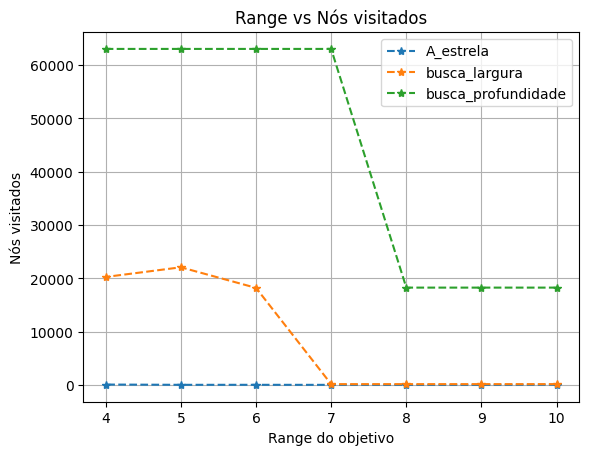

In [12]:
import matplotlib.pyplot as plt


for tipo in ["Nós visitados","Tempo de execução(s)"]:
  plt.figure()
  for j in metodos:
    name = re.search(r'(?<=ion\s).*?(?=\sat)', str(j)).group()
    variacao_objetivo = [25 - valor for valor in min_goals]
    plt.plot(variacao_objetivo,range_variation_response[name +"_"+tipo],label=name,linestyle='--', marker='*')
  plt.legend()
  plt.grid()
  plt.xlabel('Range do objetivo')
  plt.ylabel(tipo)
  plt.title(f'Range vs {tipo}')
  plt.savefig(f'/content/drive/MyDrive/Mestrado/Inteligencia_artificial_Jomi/resultados_trab/Range_vs_{tipo}')
  plt.show()

Variando a posição inicial:


In [ ]:
initial_pos_response = {}
valores_pos_inicial =  [[17,26,20,19,31],[0,0,0,0,0],[49,49,49,49,49]]

for i in metodos:
  for j in ["Nós visitados","Tempo de execução(s)"]:
    initial_pos_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+j] = []
  for posicao in valores_pos_inicial:

    estado_inicial = EstadoElevador(posicao,"inicio",None,[21,25])
    resposta,nodos,tempo = i(estado_inicial,timemax=5)
    initial_pos_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Nós visitados"].append(nodos)
    initial_pos_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Tempo de execução(s)"].append(float(tempo))
for f in initial_pos_response:
  print(initial_pos_response[f])
print(valores_pos_inicial)

[73, 94809, 6]
[0.0262, 5.0, 0.0009]
[18075, 17543, 14849]
[5.0003, 5.0641, 5.0034]
[63032, 538670, 430989]
[1.4329, 5.0001, 5.0]
[[17, 26, 20, 19, 31], [0, 0, 0, 0, 0], [49, 49, 49, 49, 49]]


In [ ]:
for f in initial_pos_response:
  print(f,initial_pos_response[f])
print(str(valores_pos_inicial))

A_estrela_Nós visitados [73, 136527, 6]
A_estrela_Tempo de execução(s) [0.0173, 5.0, 0.0008]
busca_largura_Nós visitados [15039, 19446, 19336]
busca_largura_Tempo de execução(s) [5.0001, 5.0001, 5.2037]
busca_profundidade_Nós visitados [63032, 538531, 733864]
busca_profundidade_Tempo de execução(s) [0.769, 5.0001, 5.0001]
[[17, 26, 20, 19, 31], [0, 0, 0, 0, 0], [49, 49, 49, 49, 49]]


[-1  0  1]
<function A_estrela at 0x7f87d4c869e0>
<function busca_largura at 0x7f87e9df3e20>
<function busca_profundidade at 0x7f87973d7760>


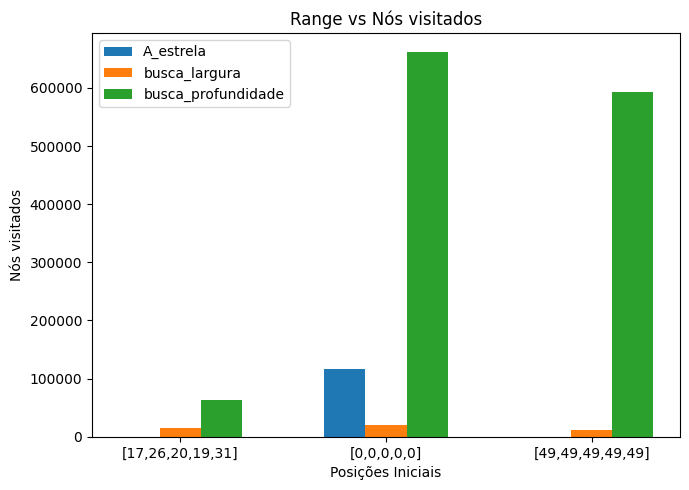

<function A_estrela at 0x7f87d4c869e0>
<function busca_largura at 0x7f87e9df3e20>
<function busca_profundidade at 0x7f87973d7760>


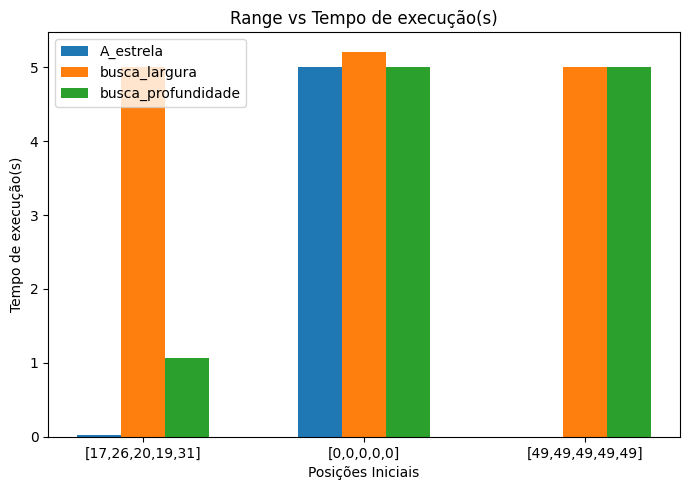

In [ ]:
import numpy as np

labels = ["[17,26,20,19,31]", "[0,0,0,0,0]", "[49,49,49,49,49]"]
x = np.array([-1,0,1])
print(x)
largura_barra = 0.2

for tipo in ["Nós visitados","Tempo de execução(s)"]:
  plt.figure(figsize=(7, 5))
  for i, metodo in enumerate(metodos):
      print(str(metodo))
      plt.bar(x-0.1+i*largura_barra, initial_pos_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(metodo)).group() +"_"+tipo], width=largura_barra, label=re.search(r'(?<=ion\s).*?(?=\sat)', str(metodo)).group())

  plt.xlabel('Posições Iniciais')
  plt.ylabel(tipo)
  plt.title(f'Range vs {tipo}')

  plt.xticks(x + largura_barra / 2, labels)
  plt.legend()
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/Mestrado/Inteligencia_artificial_Jomi/resultados_trab/Pos_inicial_vs_{tipo}')
  plt.show()



Variando numero de estados

#tem que lembrar que ta limitado em 5 segundos a execução. então se chegou em 5 s é pq não achou solução


In [ ]:
import random
inicio = [17,26,20,19,31,17,26,20]
n_elevadores = 2
estado_elevadores = [17,26]
n_input_variation_response = {}
num_eleva_graph =[]
for i in metodos:
  for j in ["Nós visitados","Tempo de execução(s)"]:
      n_input_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+j] = []


while n_elevadores <= 7:
  for i in metodos:
      estado_inicial = EstadoElevador(estado_elevadores,"inicio",None,[21,25])
      resposta,nodos,tempo = i(estado_inicial,timemax=5)
      n_input_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Nós visitados"].append(nodos)
      n_input_variation_response[re.search(r'(?<=ion\s).*?(?=\sat)', str(i)).group()+"_"+"Tempo de execução(s)"].append(float(tempo))
  estado_elevadores.append(inicio[n_elevadores])
  num_eleva_graph.append(n_elevadores)
  n_elevadores+=1


for j in n_input_variation_response:
  print(j,n_input_variation_response[j])


[17, 26, 20]
[17, 26, 20, 19]
[17, 26, 20, 19, 31]
[17, 26, 20, 19, 31, 17]
[17, 26, 20, 19, 31, 17, 26]
[17, 26, 20, 19, 31, 17, 26, 20]
A_estrela_Nós visitados [633, 6, 83, 73, 78152, 37]
A_estrela_Tempo de execução(s) [0.0143, 0.0003, 0.0051, 0.0117, 5.0002, 0.0141]
busca_largura_Nós visitados [29, 142, 29918, 16489, 13994, 11485]
busca_largura_Tempo de execução(s) [0.0003, 0.0037, 5.0, 5.0003, 5.3715, 5.0003]
busca_profundidade_Nós visitados [22, 2938, 5827, 63032, 442471, 622533]
busca_profundidade_Tempo de execução(s) [0.0001, 0.0182, 0.0374, 0.631, 5.0, 5.0004]


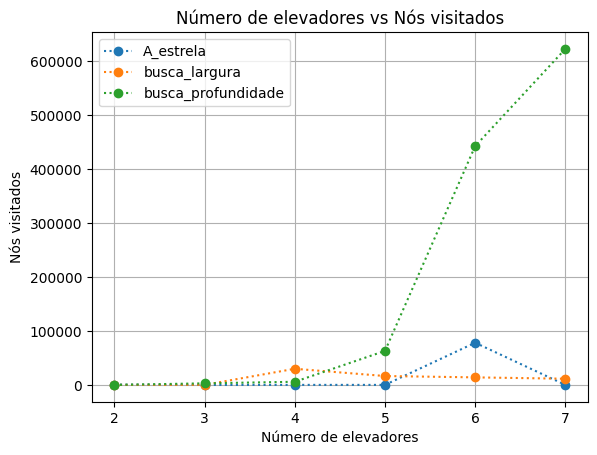

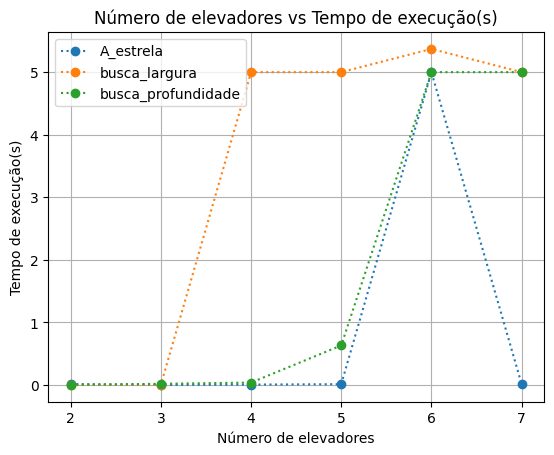

In [ ]:
for tipo in ["Nós visitados","Tempo de execução(s)"]:
  plt.figure()
  for j in metodos:
    name = re.search(r'(?<=ion\s).*?(?=\sat)', str(j)).group()
    plt.plot(num_eleva_graph,n_input_variation_response[name +"_"+tipo],label=name,linestyle=':', marker='o')
  plt.legend()
  plt.grid()
  plt.xlabel('Número de elevadores')
  plt.ylabel(tipo)
  plt.title(f'Número de elevadores vs {tipo}')
  plt.savefig(f'/content/drive/MyDrive/Mestrado/Inteligencia_artificial_Jomi/resultados_trab/N_elevadoresvs_{tipo}')
  plt.show()